# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
from citipy import citipy

# Example coordinates
latitude = 34.0522
longitude = -118.2437

# Get the nearest city
city = citipy.nearest_city(latitude, longitude)

# Print city name and country code
print(f"City: {city.city_name}, Country: {city.country_code}")


City: los angeles, Country: us


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)


Number of cities in the list: 587
['as sulayyil', 'taiohae', 'tamanrasset', 'puerto natales', 'santa ana', 'jumla', 'mount gambier', 'essaouira', 'katsuren-haebaru', 'talnakh', 'margaret river', 'jamestown', 'adamstown', 'pozanti', 'bamboo flat', 'ust-nera', 'waitangi', 'tiksi', 'edinburgh of the seven seas', 'grand-lahou', 'taro', 'tralee', 'sao joao da barra', 'yuzhno-kurilsk', 'hermanus', 'ilulissat', 'port elizabeth', 'tchaourou', 'san jose village', 'hasaki', 'invercargill', 'malvan', 'port-aux-francais', 'la palma', 'ushuaia', 'nha trang', 'enewetak', 'ojinaga', 'bilibino', 'fisterra', 'papatowai', 'fort bragg', "st. john's", 'utrik', 'takamaka', 'hithadhoo', 'flying fish cove', 'chonchi', 'crane', 'kingston', 'dunedin', 'labytnangi', 'tongchuanshi', 'magadi', 'murzuq', 'villiers', 'iqaluit', 'klyuchi', 'port glaud', 'tura', 'grytviken', 'morant bay', 'mejit', 'goulburn', 'port alfred', 'punata', 'abalak', 'paso del toro', 'avarua', 'puerto ayora', 'punta arenas', 'portland', 'aa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | as sulayyil
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | tamanrasset
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | santa ana
Processing Record 6 of Set 1 | jumla
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | essaouira
Processing Record 9 of Set 1 | katsuren-haebaru
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | pozanti
Processing Record 15 of Set 1 | bamboo flat
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | grand-lahou
Processing Record 21 of Set 1 | taro
Processing Re

In [7]:
print(len(city_data))
# city_data_df = pd.DataFrame(city_data)
# city_data_df

553


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,as sulayyil,20.4607,45.5779,37.14,11,100,1.30,SA,1722111784
1,tamanrasset,22.7850,5.5228,33.95,17,40,2.06,DZ,1722111784
2,puerto natales,-51.7236,-72.4875,0.25,86,75,5.14,CL,1722111685
3,santa ana,33.7456,-117.8678,33.22,57,20,4.63,US,1722111318
4,jumla,29.2747,82.1838,16.14,91,100,0.55,NP,1722111785


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,as sulayyil,20.4607,45.5779,37.14,11,100,1.30,SA,1722111784
1,tamanrasset,22.7850,5.5228,33.95,17,40,2.06,DZ,1722111784
2,puerto natales,-51.7236,-72.4875,0.25,86,75,5.14,CL,1722111685
3,santa ana,33.7456,-117.8678,33.22,57,20,4.63,US,1722111318
4,jumla,29.2747,82.1838,16.14,91,100,0.55,NP,1722111785


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

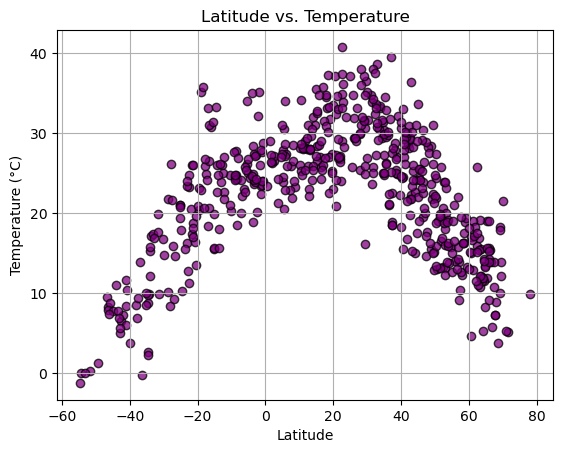

In [25]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='purple', edgecolor='k', alpha=0.75)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

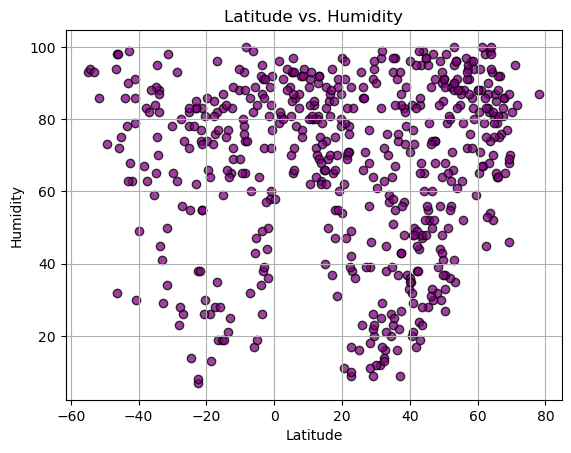

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='purple', edgecolor='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

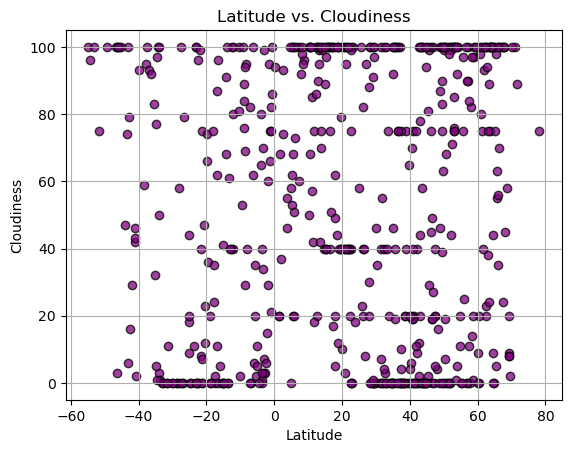

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='purple', edgecolor='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

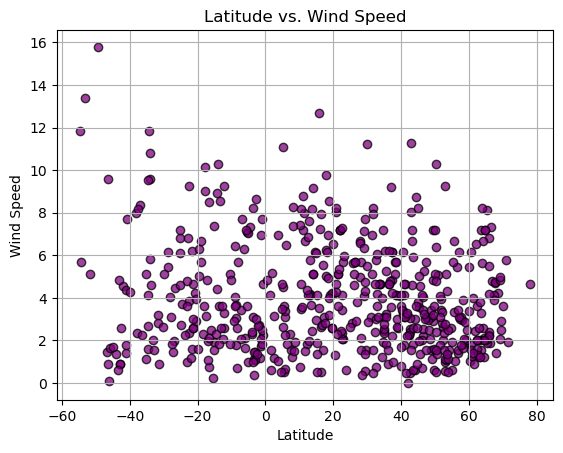

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple', edgecolor='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show plot
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,as sulayyil,20.4607,45.5779,37.14,11,100,1.30,SA,1722111784
1,tamanrasset,22.7850,5.5228,33.95,17,40,2.06,DZ,1722111784
3,santa ana,33.7456,-117.8678,33.22,57,20,4.63,US,1722111318
4,jumla,29.2747,82.1838,16.14,91,100,0.55,NP,1722111785
6,essaouira,31.5125,-9.7700,23.72,83,40,5.14,MA,1722111786


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,0.25,86,75,5.14,CL,1722111685
5,mount gambier,-37.8333,140.7667,6.96,83,95,2.36,AU,1722111785
9,margaret river,-33.9500,115.0667,15.35,82,50,9.60,AU,1722111696
11,adamstown,-25.0660,-130.1015,20.99,78,18,6.83,PN,1722111687
15,waitangi,-43.9535,-176.5597,11.01,86,47,1.34,NZ,1722111684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6905724519952146


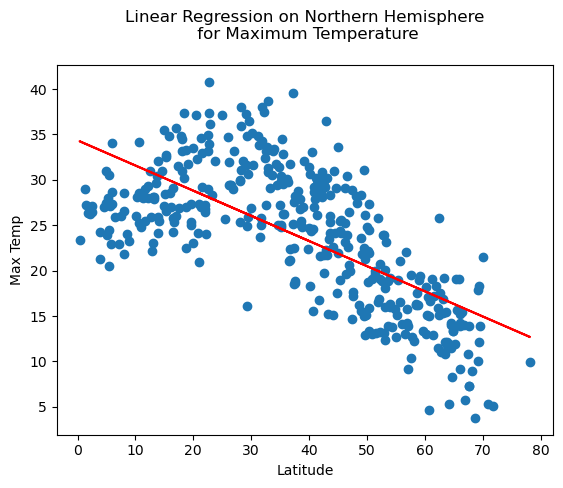

In [42]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                      f"Linear Regression on Northern Hemisphere\n for Maximum Temperature\n",
                      "Latitude", "Max Temp", (5, -20))

The r-value is: 0.8287940501851685


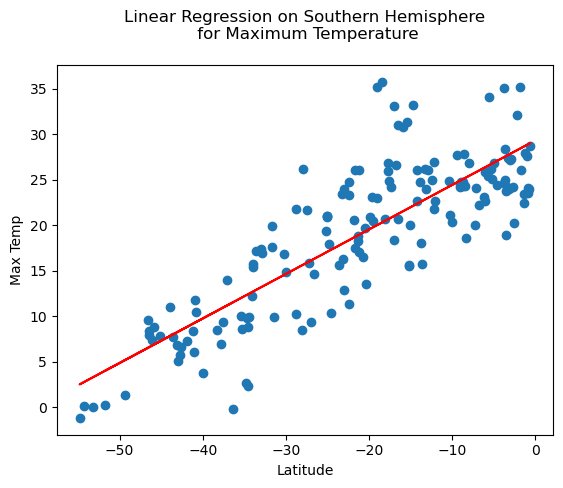

In [41]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                      f"Linear Regression on Southern Hemisphere\n for Maximum Temperature\n",
                      "Latitude", "Max Temp", (5, -20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05910251472609755


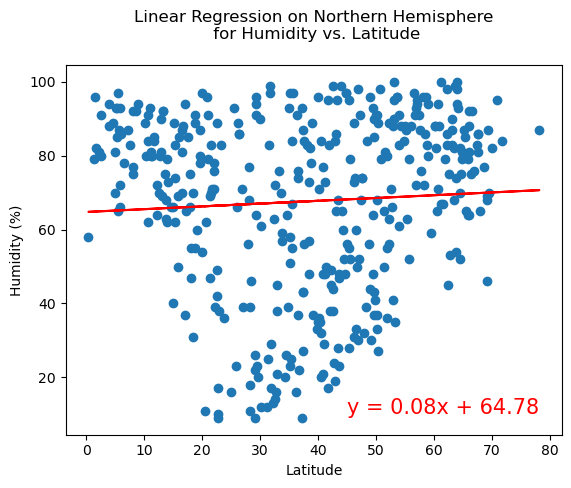

In [43]:
# Northern Hemisphere

# Perform linear regression on Northern Hemisphere humidity vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       f"Linear Regression on Northern Hemisphere\n for Humidity vs. Latitude\n", 
                       "Latitude", "Humidity (%)", (45, 10))

The r-value is: -0.13769524609232348


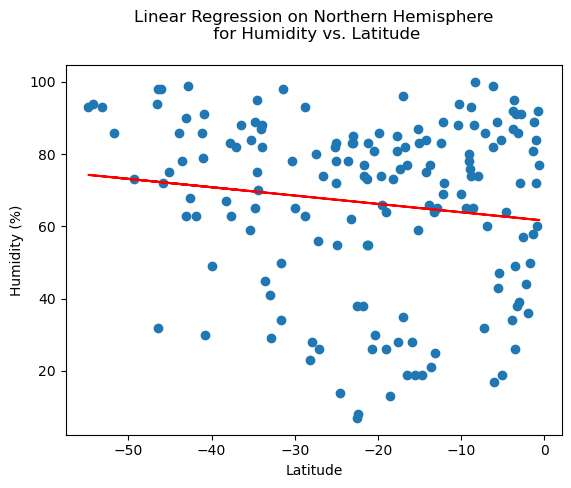

In [44]:
# Southern Hemisphere



# Perform linear regression on Northern Hemisphere humidity vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       f"Linear Regression on Northern Hemisphere\n for Humidity vs. Latitude\n", 
                       "Latitude", "Humidity (%)", (45, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05688529963073584


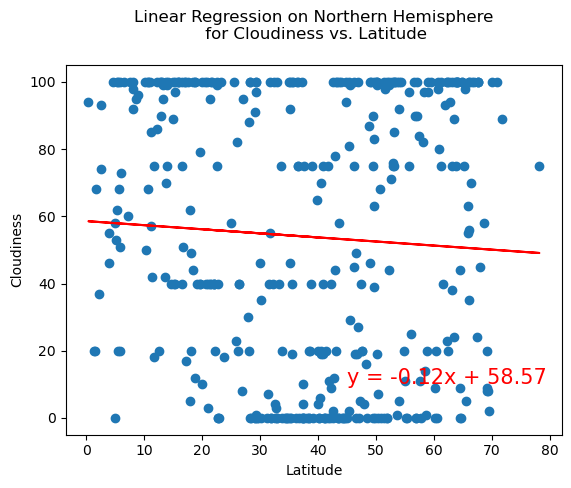

In [50]:
# Northern Hemisphere



# Perform linear regression on Northern Hemisphere Cloudiness vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       f"Linear Regression on Northern Hemisphere\n for Cloudiness vs. Latitude\n", 
                       "Latitude", "Cloudiness", (45, 10))

The r-value is: -0.1377604194325409


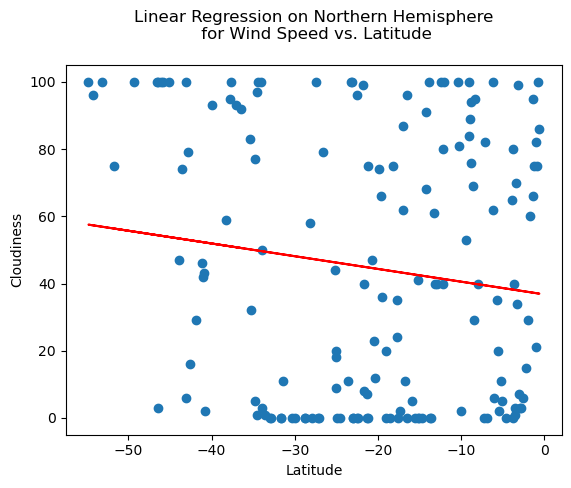

In [49]:
# Southern Hemisphere

# Perform linear regression on Northern Hemisphere Wind Speed vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       f"Linear Regression on Northern Hemisphere\n for Wind Speed vs. Latitude\n", 
                       "Latitude", "Cloudiness", (45, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17045703531112127


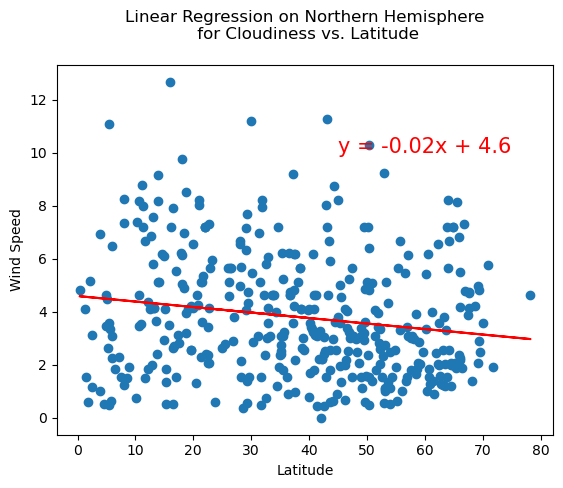

In [52]:
# Northern Hemisphere

# Perform linear regression on Northern Hemisphere Wind Speed vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       f"Linear Regression on Northern Hemisphere\n for Cloudiness vs. Latitude\n", 
                       "Latitude", "Wind Speed", (45, 10))

The r-value is: -0.1701064215189507


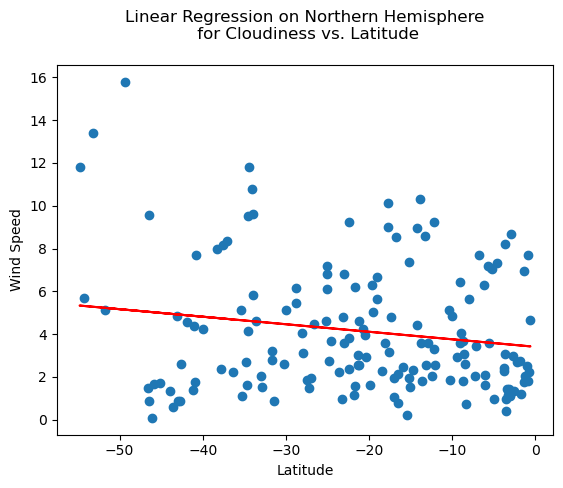

In [53]:
# Southern Hemisphere

# Perform linear regression on Northern Hemisphere Wind Speed vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       f"Linear Regression on Northern Hemisphere\n for Cloudiness vs. Latitude\n", 
                       "Latitude", "Wind Speed", (45, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE